In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name= fm.FontProperties(fname='C:\\Windows\\Fonts\\malgun.ttf').get_name()
plt.rc('font',family=font_name)

import matplotlib as mlp
mlp.rcParams['axes.unicode_minus']=False

## 주제: 서울시  구별 cctv 현황 분석

### 부제: 우리 동네 cctv는 충분한가

- 서울시 자치구 년도별 cctv 설치 현황
- 서울시 주민등록인구(구별) 통계

## 1. Data Definition

### (1) cctv load

In [3]:
cctv_seoul= pd.read_csv('data/seoul/cctv.csv')
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


### (2) population load
다중 인덱스, 다중 컬럼

In [4]:
pop_seoul= pd.read_excel('data/seoul/Report.xls', usecols='b, d, g, j, n', header=2)
pop_seoul

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752
5,광진구,371671,357149,14522,44470
6,동대문구,364962,349308,15654,56284
7,중랑구,411552,406868,4684,59992
8,성북구,453902,442226,11676,66896
9,강북구,327511,323862,3649,57002


## (3) EDA & Preprocessing

#### 1) 컬럼 이름 변경
cctv와 pop의 자치구 이름 통일

In [5]:
cctv_seoul.rename(columns={'기관명':'구별'}, inplace=True)   #cctv의 '기관명' -> '구별'

In [6]:
pop_seoul.columns=['구별','인구수','한국인','외국인','고령자']

In [7]:
pop_seoul

,구별,인구수,한국인,외국인,고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752
5,광진구,371671,357149,14522,44470
6,동대문구,364962,349308,15654,56284
7,중랑구,411552,406868,4684,59992
8,성북구,453902,442226,11676,66896
9,강북구,327511,323862,3649,57002


#### 2) cctv 현황 탐색
최대, 최소 설치된 구

In [8]:
cctv_seoul['구별'][cctv_seoul['소계']==cctv_seoul['소계'].max()]
cctv_seoul['구별'][cctv_seoul['소계']==cctv_seoul['소계'].min()]

9    도봉구
Name: 구별, dtype: object

In [9]:
cctv_seoul[cctv_seoul['소계']==cctv_seoul['소계'].max()]['구별']

0    강남구
Name: 구별, dtype: object

In [10]:
cctv_seoul.sort_values('소계')

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109
12,마포구,980,314,118,169,379
1,강동구,1010,379,99,155,377
23,중구,1023,413,190,72,348
17,송파구,1081,529,21,68,463
13,서대문구,1254,844,50,68,292


#### 3) '최근증가율'이라는 파생변수 추가
연도별 설치대수 증가 추이

- (2014+2015+2016)/2013 이전 *100
- cctv의 설치 증가율에 따라 최대, 최소 증가 구

In [11]:
cctv_seoul['최근 증가율']= ((cctv_seoul['2014년']+cctv_seoul['2015년']+cctv_seoul['2016년'])/cctv_seoul['2013년도 이전'])*100
cctv_seoul

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780
5,광진구,878,573,78,53,174,53.228621
6,구로구,1884,1142,173,246,323,64.973730
7,금천구,1348,674,51,269,354,100.000000
8,노원구,1566,542,57,451,516,188.929889
9,도봉구,825,238,159,42,386,246.638655


In [12]:
cctv_seoul.sort_values('최근 증가율', ascending= False).head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911


#### 4) cctv 중간 저장

In [13]:
cctv_seoul.to_csv('data/seoul/cctv_seoul.csv', encoding='utf8')   # index 같이 저장

In [14]:
cctv_seoul= pd.read_csv('data/seoul/cctv_seoul.csv')
del cctv_seoul['Unnamed: 0']
cctv_seoul

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780
5,광진구,878,573,78,53,174,53.228621
6,구로구,1884,1142,173,246,323,64.973730
7,금천구,1348,674,51,269,354,100.000000
8,노원구,1566,542,57,451,516,188.929889
9,도봉구,825,238,159,42,386,246.638655


#### 5) 인구 데이터 전처리
필요없는 행 삭제

In [15]:
pop_seoul.drop([0], inplace=True)

In [16]:
pop_seoul.info()
pop_seoul[pop_seoul['구별'].isnull()]
pop_seoul['구별'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 1 to 26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구별      25 non-null     object
 1   인구수     26 non-null     int64 
 2   한국인     26 non-null     int64 
 3   외국인     26 non-null     int64 
 4   고령자     26 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.1+ KB


종로구     1
마포구     1
송파구     1
강남구     1
서초구     1
관악구     1
동작구     1
영등포구    1
금천구     1
구로구     1
강서구     1
양천구     1
서대문구    1
중구      1
은평구     1
노원구     1
도봉구     1
강북구     1
성북구     1
중랑구     1
동대문구    1
광진구     1
성동구     1
용산구     1
강동구     1
Name: 구별, dtype: int64

In [17]:
pop_seoul.drop([26], inplace=True)

In [18]:
pop_seoul

,구별,인구수,한국인,외국인,고령자
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752
5,광진구,371671,357149,14522,44470
6,동대문구,364962,349308,15654,56284
7,중랑구,411552,406868,4684,59992
8,성북구,453902,442226,11676,66896
9,강북구,327511,323862,3649,57002
10,도봉구,345041,342861,2180,54293


#### 6) 인구데이터 현황
구별로 인구수 탐색(전체, 외국인, 고령자)

전체 인구 대비 외국인 비율, 고령자 비율 파생변수 추가

In [19]:
pop_seoul.sort_values('인구수', ascending=False)
pop_seoul.sort_values('고령자', ascending=False)
pop_seoul.sort_values('외국인', ascending=False)

,구별,인구수,한국인,외국인,고령자
19,영등포구,403988,369128,34860,54704
17,구로구,440396,408369,32027,59838
18,금천구,253344,234238,19106,34640
21,관악구,522292,504445,17847,70807
6,동대문구,364962,349308,15654,56284
3,용산구,245411,229909,15502,37238
5,광진구,371671,357149,14522,44470
13,서대문구,324871,312311,12560,49645
20,동작구,406715,394353,12362,57711
8,성북구,453902,442226,11676,66896


In [20]:
pop_seoul['외국인비율']=pop_seoul['외국인']/pop_seoul['인구수'] *100
pop_seoul['고령자비율']=pop_seoul['고령자']/pop_seoul['인구수'] *100
pop_seoul.sort_values('고령자비율')

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,671994,665282,6712,77978,0.998818,11.603973
23,강남구,557865,552976,4889,65859,0.876377,11.805544
15,양천구,473087,469221,3866,56070,0.817186,11.851943
5,광진구,371671,357149,14522,44470,3.907219,11.964883
22,서초구,445164,440954,4210,54055,0.945719,12.142716
16,강서구,608361,601696,6665,77381,1.095567,12.719586
14,마포구,385624,374742,10882,50122,2.821920,12.997635
25,강동구,438225,434027,4198,56983,0.957955,13.003138
4,성동구,314551,306532,8019,41752,2.549348,13.273523
11,노원구,555803,551902,3901,75081,0.701867,13.508563


### (3) Final Analysis

#### 1) 인구 대비 cctv 설치 현황
cctv와 pop 합치기


In [21]:
data_result= pd.merge(cctv_seoul, pop_seoul, on='구별')
data_result

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,557865,552976,4889,65859,0.876377,11.805544
1,강동구,1010,379,99,155,377,166.490765,438225,434027,4198,56983,0.957955,13.003138
2,강북구,831,369,120,138,204,125.203252,327511,323862,3649,57002,1.114161,17.404606
3,강서구,911,388,258,184,81,134.793814,608361,601696,6665,77381,1.095567,12.719586
4,관악구,2109,846,260,390,613,149.290780,522292,504445,17847,70807,3.417054,13.556976
5,광진구,878,573,78,53,174,53.228621,371671,357149,14522,44470,3.907219,11.964883
6,구로구,1884,1142,173,246,323,64.973730,440396,408369,32027,59838,7.272319,13.587317
7,금천구,1348,674,51,269,354,100.000000,253344,234238,19106,34640,7.541525,13.673109
8,노원구,1566,542,57,451,516,188.929889,555803,551902,3901,75081,0.701867,13.508563
9,도봉구,825,238,159,42,386,246.638655,345041,342861,2180,54293,0.631809,15.735231


In [22]:
# 필요없는 컬럼 삭제
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result

,구별,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544
1,강동구,1010,166.490765,438225,434027,4198,56983,0.957955,13.003138
2,강북구,831,125.203252,327511,323862,3649,57002,1.114161,17.404606
3,강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586
4,관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976
5,광진구,878,53.228621,371671,357149,14522,44470,3.907219,11.964883
6,구로구,1884,64.973730,440396,408369,32027,59838,7.272319,13.587317
7,금천구,1348,100.000000,253344,234238,19106,34640,7.541525,13.673109
8,노원구,1566,188.929889,555803,551902,3901,75081,0.701867,13.508563
9,도봉구,825,246.638655,345041,342861,2180,54293,0.631809,15.735231


In [23]:
# '구별' 컬럼을 인덱스로 변경
data_result.set_index('구별',inplace=True)
data_result

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544
강동구,1010,166.490765,438225,434027,4198,56983,0.957955,13.003138
강북구,831,125.203252,327511,323862,3649,57002,1.114161,17.404606
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586
관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976
광진구,878,53.228621,371671,357149,14522,44470,3.907219,11.964883
구로구,1884,64.973730,440396,408369,32027,59838,7.272319,13.587317
금천구,1348,100.000000,253344,234238,19106,34640,7.541525,13.673109
노원구,1566,188.929889,555803,551902,3901,75081,0.701867,13.508563


#### 2) cctv 개수와 인구의 3가지 변수(인구수, 외국인, 고령자)가 관계 있는지 확인
상관계수: -1~1 사이의 값. 0에 가까울 수록 관계 없음

In [24]:
np.corrcoef(data_result['외국인비율'], data_result['소계'])   # 상관계수 - 0.04: 관계없음

array([[ 1.        , -0.04656978],
       [-0.04656978,  1.        ]])

In [25]:
np.corrcoef(data_result['고령자비율'], data_result['소계'])   # 상관계수 - 0.26: 약한관계

array([[ 1.        , -0.26783452],
       [-0.26783452,  1.        ]])

In [26]:
np.corrcoef(data_result['인구수'], data_result['소계'])   # 상관계수 0.23

array([[1.        , 0.23037183],
       [0.23037183, 1.        ]])

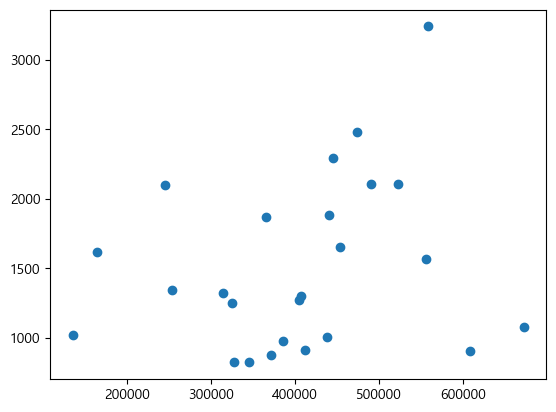

In [27]:
# plt.scatter(data_result['외국인비율',data_result['소계'])
# plt.scatter(data_result['고령자비율'],data_result['소계'])
plt.scatter(data_result['인구수'],data_result['소계'])

#### 3) 중간 저장

In [28]:
data_result.to_csv('data/seoul/cctv_result.csv', encoding='utf8')

In [29]:
data_result= pd.read_csv('data/seoul/cctv_result.csv', index_col='구별')
data_result

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544
강동구,1010,166.490765,438225,434027,4198,56983,0.957955,13.003138
강북구,831,125.203252,327511,323862,3649,57002,1.114161,17.404606
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586
관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976
광진구,878,53.228621,371671,357149,14522,44470,3.907219,11.964883
구로구,1884,64.973730,440396,408369,32027,59838,7.272319,13.587317
금천구,1348,100.000000,253344,234238,19106,34640,7.541525,13.673109
노원구,1566,188.929889,555803,551902,3901,75081,0.701867,13.508563


#### 4) 시각화

<AxesSubplot:ylabel='구별'>

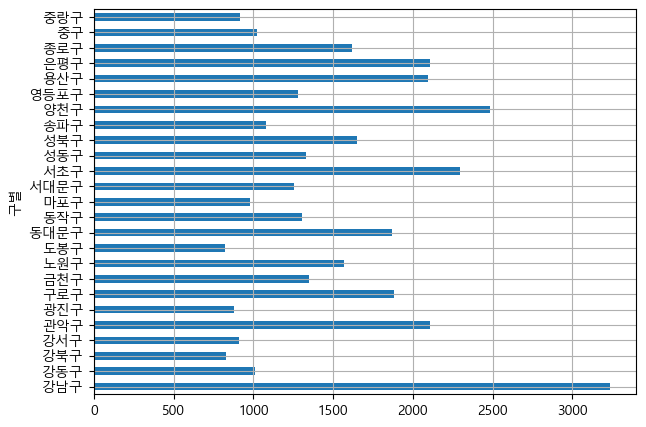

In [30]:
# cctv가 가장 많이 설치된 구
data_result['소계'].plot.barh(figsize=(7,5),grid=True)

In [31]:
# 인구 대비 cctv 개수
data_result['cctv비율']= data_result['소계']/data_result['인구수']*100
data_result

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율
구별,,,,,,,,,
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544,0.580427
강동구,1010,166.490765,438225,434027,4198,56983,0.957955,13.003138,0.230475
강북구,831,125.203252,327511,323862,3649,57002,1.114161,17.404606,0.253732
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586,0.149747
관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976,0.403797
광진구,878,53.228621,371671,357149,14522,44470,3.907219,11.964883,0.236230
구로구,1884,64.973730,440396,408369,32027,59838,7.272319,13.587317,0.427797
금천구,1348,100.000000,253344,234238,19106,34640,7.541525,13.673109,0.532083
노원구,1566,188.929889,555803,551902,3901,75081,0.701867,13.508563,0.281755


<AxesSubplot:xlabel='구별', ylabel='cctv비율'>

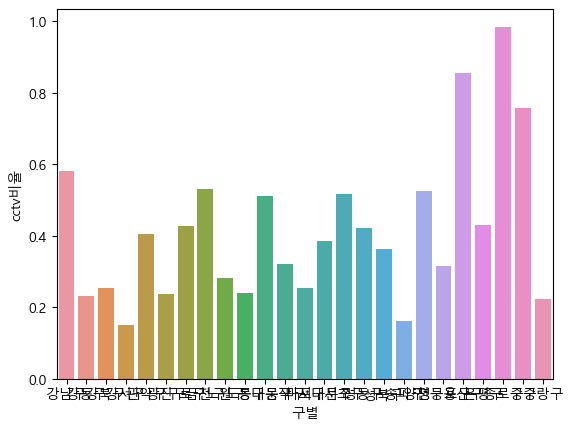

In [32]:
sns.barplot(x=data_result.index, y='cctv비율', data= data_result)

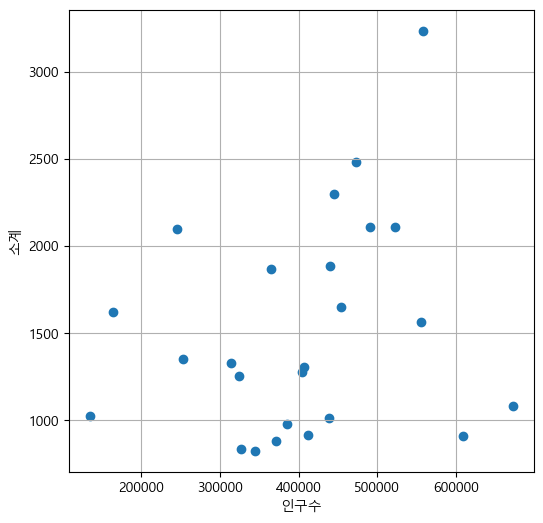

In [33]:
# cctv 개수와 인구수가 서로 관계있는지 확인
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'])
plt.xlabel('인구수')
plt.ylabel('소계')
plt.grid()

In [34]:
# y= ax + b
# 회귀선: 1)데이터를 설명, 2)예측     sns.lmplot
# 직접 선을 그어서 커스터마이징
# sns.regplot(x=data_result.index, y='소계', data= data_result)
pf= np.polyfit(data_result['인구수'], data_result['소계'], 1) # x=인구수, y=소계, 일차식
p1= np.poly1d(pf) # 1차방정식
print(p1)

 
0.001104 x + 1069


C:\Users\acorn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='인구수', ylabel='소계'>

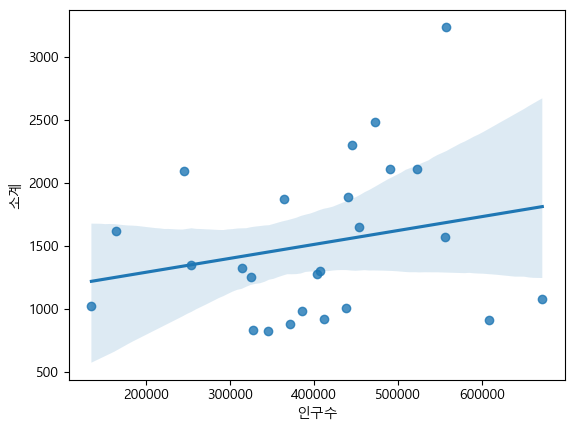

In [35]:
sns.regplot(data_result['인구수'], data_result['소계'])

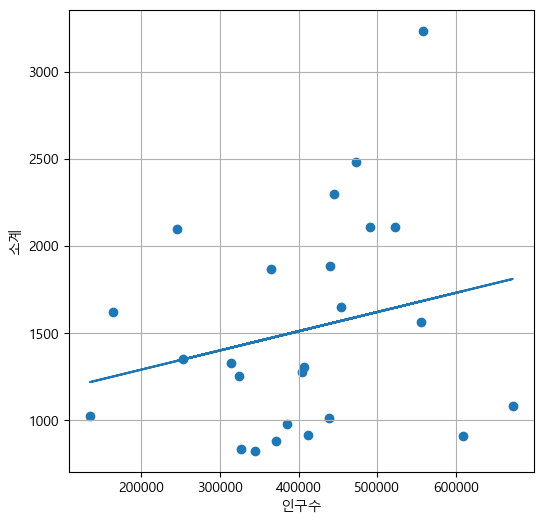

In [36]:
plt.figure(figsize=(6,6))

plt.scatter(data_result['인구수'], data_result['소계'])
plt.plot(data_result['인구수'], p1(data_result['인구수']))# 선형방정식 그리기

plt.xlabel('인구수')
plt.ylabel('소계')
plt.grid()

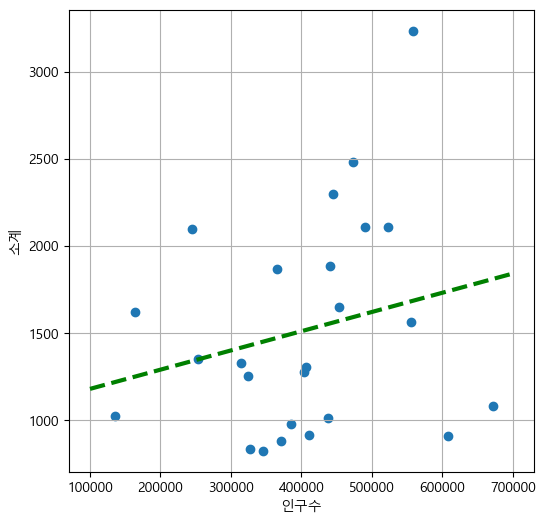

In [37]:
fx= np.linspace(100000,700000,100)

plt.figure(figsize=(6,6))

plt.scatter(data_result['인구수'], data_result['소계'])
plt.plot(fx, p1(fx), lw=3, color='g', ls='dashed')# 선형방정식 그리기

plt.xlabel('인구수')
plt.ylabel('소계')
plt.grid()

In [38]:
# 각 데이터의 오차 절댓값을 구해서 '오차' 파생변수 생성
data_result['오차']= np.abs(data_result['소계'] - p1(data_result['인구수'])) 
df_sort= data_result.sort_values('오차', ascending=False)
df_sort

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544,0.580427,1553.296412
양천구,2482,34.671731,473087,469221,3866,56070,0.817186,11.851943,0.524639,890.918761
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586,0.149747,829.467513
용산구,2096,53.216374,245411,229909,15502,37238,6.316750,15.173729,0.854077,756.346747
서초구,2297,63.371266,445164,440954,4210,54055,0.945719,12.142716,0.515990,736.754790
송파구,1081,104.347826,671994,665282,6712,77978,0.998818,11.603973,0.160865,729.738939
도봉구,825,246.638655,345041,342861,2180,54293,0.631809,15.735231,0.239102,624.677016
중랑구,916,79.960707,411552,406868,4684,59992,1.138131,14.577016,0.222572,607.126685
광진구,878,53.228621,371671,357149,14522,44470,3.907219,11.964883,0.236230,601.085154


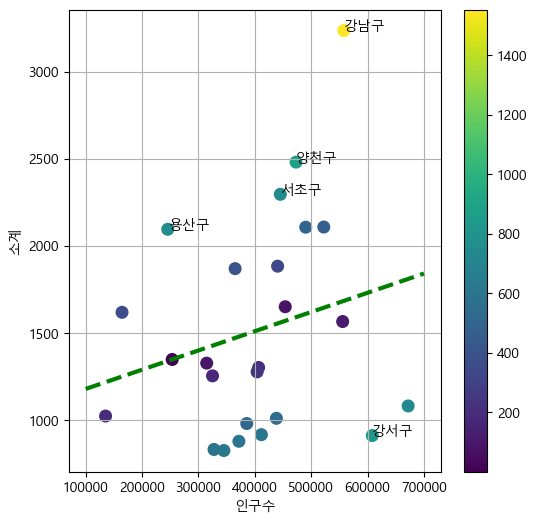

In [39]:
fx= np.linspace(100000,700000,100)

plt.figure(figsize=(6,6))

plt.scatter(data_result['인구수'], data_result['소계'], c= data_result['오차'], s=70)
plt.plot(fx, p1(fx), lw=3, color='g', ls='dashed')# 선형방정식 그리기

plt.xlabel('인구수')
plt.ylabel('소계')
plt.grid()
plt.colorbar()

for i in range(5):
    plt.text(df_sort['인구수'][i], df_sort['소계'][i], df_sort.index[i]) # x좌표, y좌표, 텍스트

In [40]:
# 지도를
# https://github.com/southkorea/southkorea-maps
import folium

geo_path= 'data/seoul/skorea_municipalities_geo_simple_seoul.json'

map= folium.Map(location=[37.5, 127], zoom_start=10)

map.choropleth(geo_data= geo_path, data= data_result['소계'], key_on='feature.id',
              columns=[data_result.index, '소계'], fill_color='YlGn')
map

C:\Users\acorn\anaconda3\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [41]:
# 중간 저장
df_sort.to_csv('data/seoul/cctv_result.csv', encoding='utf8')

In [47]:
apt = pd.read_csv("data/20200331.csv", encoding="euc-kr")
apt.columns = ["city", "size", "year", "month", "price"] # 컬럼명 수정
apt.groupby('year').mean('price')

,month
year,
2015,11.0
2016,6.5
2017,6.5
2018,6.5
2019,6.5
2020,2.0


In [50]:
apt

,city,size,year,month,price
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...
4585,제주,전체,2020,3,3955
4586,제주,전용면적 60㎡이하,2020,3,4039
4587,제주,전용면적 60㎡초과 85㎡이하,2020,3,3962
4588,제주,전용면적 85㎡초과 102㎡이하,2020,3,NaN
